<div style="text-align: center;">
    <h1><b>Practical Work 3 : About implicit Crank-Nicolson scheme</b></h1>
</div>

*Authored in 2025 for educational purpose by S. Cardonna, Q. Richard, V. Lleras & P. Azerad. If you identify any issues or have suggestions for improvement, feel free to contact me.*  
  
**Introduction**  
This lab session is focused on the implementation and analysis of the implicit trapezoidal scheme and its comparison with the exact solution and adaptive Runge-Kutta methods.


<div style="text-align: center;">
    <h2><b>Part 1 - Some remarks about the scheme</b></h2>
</div>

The implicit trapezoidal scheme (also referred to as the Crank-Nicolson scheme) is defined as:
$$
y_1 = y_0 + \frac{h}{2} \big( f(t_0, y_0) + f(t_0 + h, y_1) \big)
$$
Here, $y_1$ is determined as the fixed point of a function. When $h$ is small and the mapping $y \mapsto f(t, y)$ is Lipschitz continuous, it can be shown that the function $g: z \mapsto y_0 + \frac{h}{2} \big( f(t_0, y_0) + f(t_0 + h, z) \big)$ is contracting. Consequently, a unique fixed point $y_1$ exists. To compute $y_1$ in practice, we perform a few fixed-point iterations defined as:

$$
y_1^{(k+1)} = g\big( y_1^{(k)} \big)
$$
with the initial guess $y_1^{(0)} = y_0 + h f(t_0, y_0)$. In this context, three iterations are typically sufficient, and no stopping criterion is used. Once $y_1$ is computed, the algorithm advances to the next time step, $t = t + h$, and the process is repeated.

In the following, we will focus on solving the differential equation:
$$
y' = 3y - 4 e^{-t}, \tag{1}
$$
whose general solution is $y(t) = e^{-t} + C e^{3t}$, where $C \in \mathbb{R}$. When the initial condition $y(0) = 1$ is prescribed, the exact solution becomes $y(t) = e^{-t}$.



<div style="text-align: center;">
    <h2><b>Part 2 - Implementation</b></h2>
</div>

Let us now focus on implemnting our fist implicit scheme.

#### Question 1 - Implementing Crank-Nicolson ####  
Here is our implementation of the implicit scheme.


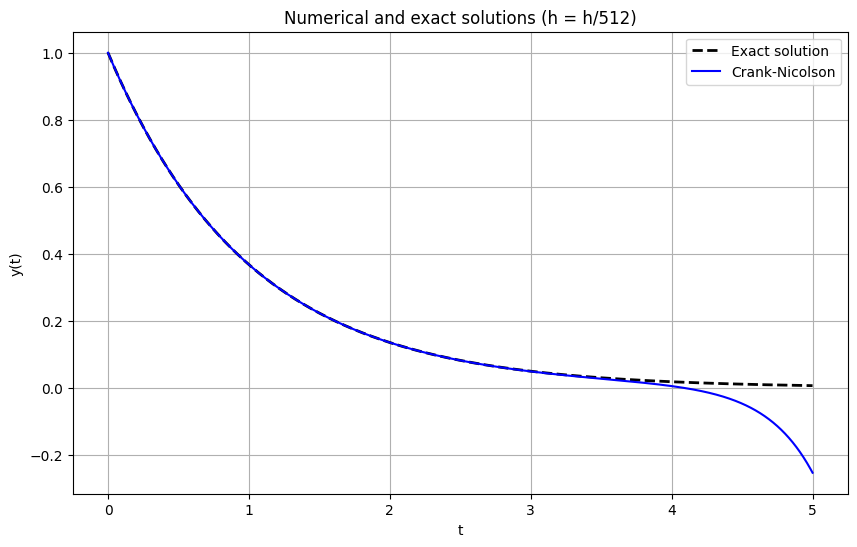

Maximum error for h = 1.95312e-03: 2.59829e-01


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def trapezoidal_implicit(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0

    for j in range(len(t_vals) - 1):
        # Fixed-point iteration for implicit scheme
        y_guess = num_vals[j] + h * f(t_vals[j], num_vals[j])  # Initial guess
        for _ in range(3):  # Perform 3 fixed-point iterations
            y_guess = num_vals[j] + (h / 2) * (f(t_vals[j], num_vals[j]) + f(t_vals[j + 1], y_guess))
        num_vals[j + 1] = y_guess

    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 5
y0 = 1
h_initial = 1

# Define the ODE: y' = 3y - 4exp(-t)
f = lambda t, y: 3 * y - 4 * np.exp(-t)

# Exact solution
def exact_solution(t):
    return np.exp(-t)

# Compute numerical solution for h = h_initial / 512
h_final = h_initial / 512
t_vals, trap_vals = trapezoidal_implicit(f, t0, y0, t_final, h_final)

# Plot numerical and exact solutions
plt.figure(figsize=(10, 6))
plt.plot(t_vals, exact_solution(t_vals), '--', label="Exact solution", color="black", linewidth=2)
plt.plot(t_vals, trap_vals, '-', label="Crank-Nicolson", color="blue")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Numerical and exact solutions (h = h/512)")
plt.legend()
plt.grid()
plt.show()

# Error computation
errors = []
h_values = [h_initial / (2**i) for i in range(10)]  # h, h/2, ..., h/512
for h_val in h_values:
    t_vals, trap_vals = trapezoidal_implicit(f, t0, y0, t_final, h_val)
    exact_vals = exact_solution(t_vals)
    errors.append(np.max(np.abs(trap_vals - exact_vals)))

# Print error for smallest step size
print(f"Maximum error for h = {h_values[-1]:.5e}: {errors[-1]:.5e}")


#### Question 2 - Convergence analysis ####  

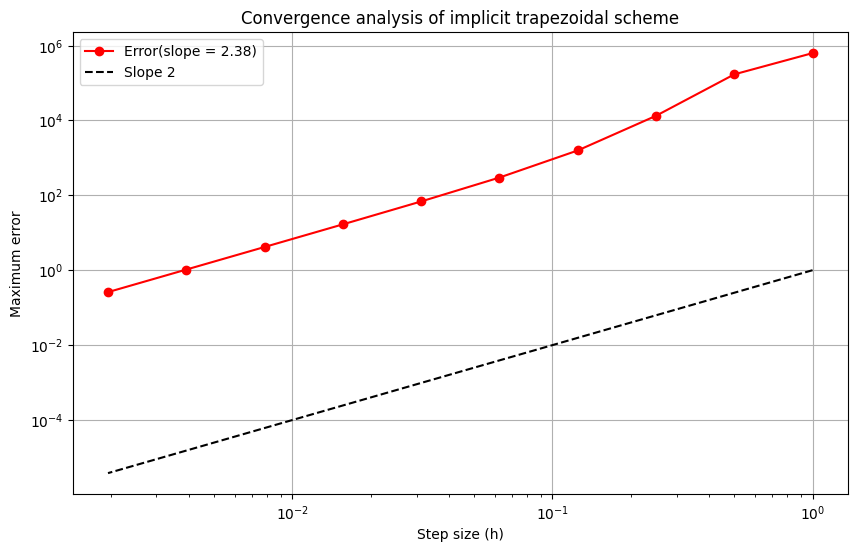

In [128]:
# Log-log plot of error vs step size
plt.figure(figsize=(10, 6))
slope = np.polyfit(np.log(h_values), np.log(errors), 1)
plt.loglog(h_values, errors, 'o-', label="Error(slope = {:.2f})".format(slope[0]), color="red")
plt.loglog(h_values, [h**2 for h in h_values], '--', label="Slope 2", color="black")
plt.xlabel("Step size (h)")
plt.ylabel("Maximum error")
plt.title("Convergence analysis of implicit trapezoidal scheme")
plt.legend()
plt.grid()
plt.show()


#### Question 3 - Comparison with Dormand-Prince scheme ####  
We now want to compare our Crank-Nicolson scheme with the commonly used fifth-order Dormand-Prince (RK45 in Python).

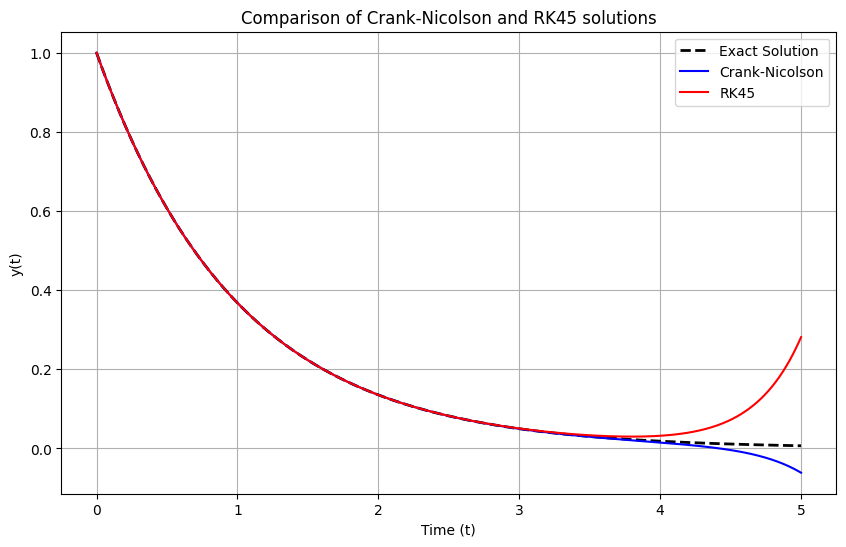

Maximum error for Crank-Nicolson: 6.81067e-02
Maximum error for RK45: 2.74506e-01


In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def trapezoidal_implicit(f, t0, y0, t_final, h):
    t_vals = np.arange(t0, t_final + h, h)
    num_vals = np.zeros(len(t_vals))
    num_vals[0] = y0

    for j in range(len(t_vals) - 1):
        # Fixed-point iteration for implicit scheme
        y_guess = num_vals[j] + h * f(t_vals[j], num_vals[j])  # Initial guess
        for _ in range(3):  # Perform 3 fixed-point iterations
            y_guess = num_vals[j] + (h / 2) * (f(t_vals[j], num_vals[j]) + f(t_vals[j + 1], y_guess))
        num_vals[j + 1] = y_guess

    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 5
y0 = 1
h = 1e-3

# Define the ODE: y' = 3y - 4exp(-t)
f = lambda t, y: 3 * y - 4 * np.exp(-t)

# Exact solution
def exact_solution(t):
    return np.exp(-t)

# Compute Crank-Nicolson solution
t_vals, trap_vals = trapezoidal_implicit(f, t0, y0, t_final, h)

# Compute RK45 solution using solve_ivp
rk45_solution = solve_ivp(f, [t0, t_final], [y0], method='RK45', dense_output=True)
rk45_vals = rk45_solution.sol(t_vals)[0]  # Evaluate RK45 at the same points as Crank-Nicolson 

# Plot numerical solutions and exact solution
plt.figure(figsize=(10, 6))
plt.plot(t_vals, exact_solution(t_vals), '--', label="Exact Solution", color="black", linewidth=2)
plt.plot(t_vals, trap_vals, '-', label="Crank-Nicolson", color="blue")
plt.plot(t_vals, rk45_vals, '-', label="RK45", color="red")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Comparison of Crank-Nicolson and RK45 solutions")
plt.legend()
plt.grid()
plt.show()

# Compute error for Crank-Nicolson
exact_vals = exact_solution(t_vals)
trap_error = np.max(np.abs(trap_vals - exact_vals))

# Compute error for RK45
rk45_error = np.max(np.abs(rk45_vals - exact_solution(t_vals)))

# Print errors
print(f"Maximum error for Crank-Nicolson: {trap_error:.5e}")
print(f"Maximum error for RK45: {rk45_error:.5e}")

The general solution of the differential equation is:
$$
y(t) = C e^{3t} + e^{-t}.
$$
For the exact solution satisfying the initial condition, we have $y(t) = e^{-t}$, i.e., $C = 0$. However, due to slight deviations from the exact solution, numerical schemes compute approximations with $C \ll 1$, but not strictly zero. Over time, the term $C e^{3t}$ then becomes dominant.

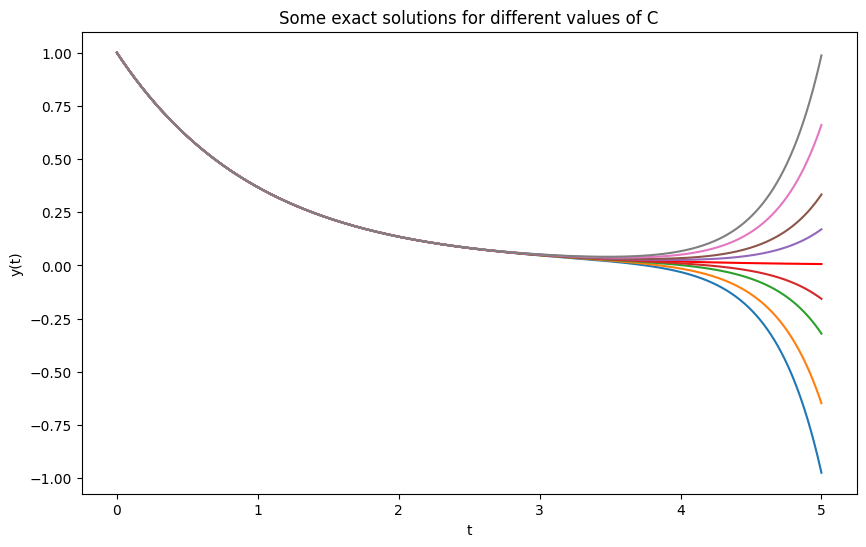

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(t_vals, np.exp(-t_vals),'r')
for C in [-3e-7, -2e-7, -1e-7,-0.5e-7,0.5e-7,1e-7, 2e-7, 3e-7 ]:
    plt.plot(t_vals, C * np.exp(3 * t_vals) + np.exp(-t_vals))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Some exact solutions for different values of C')
plt.show()